In [1]:
import os
import nltk
import matplotlib as plt
import pandas as pd
import numpy as np
import re
import seaborn as sns
from collections import defaultdict  # Import defaultdict

In [2]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [19]:
folder_path="/content/drive/MyDrive/Colab Notebooks/1000_docs_data/Assignment_4/archive_4"
file_names = os.listdir(folder_path)

file_names[::-5]

['technologie_77.txt',
 'technologie_68.txt',
 'technologie_86.txt',
 'technologie_76.txt',
 'technologie_98.txt',
 'technologie_80.txt',
 'technologie_90.txt',
 'technologie_8.txt',
 'technologie_79.txt',
 'technologie_5.txt',
 'technologie_10.txt',
 'technologie_16.txt',
 'technologie_4.txt',
 'technologie_24.txt',
 'technologie_46.txt',
 'technologie_40.txt',
 'technologie_3.txt',
 'technologie_37.txt',
 'technologie_13.txt',
 'technologie_51.txt',
 'sport_65.txt',
 'sport_80.txt',
 'sport_69.txt',
 'sport_9.txt',
 'sport_52.txt',
 'sport_6.txt',
 'sport_98.txt',
 'sport_70.txt',
 'sport_93.txt',
 'sport_79.txt',
 'sport_99.txt',
 'sport_35.txt',
 'sport_30.txt',
 'sport_43.txt',
 'sport_21.txt',
 'sport_46.txt',
 'sport_45.txt',
 'sport_11.txt',
 'sport_3.txt',
 'sport_44.txt',
 'sport_14.txt',
 'sport_15.txt',
 'sport_38.txt',
 'space_54.txt',
 'space_84.txt',
 'space_46.txt',
 'space_60.txt',
 'space_40.txt',
 'space_44.txt',
 'space_6.txt',
 'space_82.txt',
 'space_71.txt',
 'sp


 - Reads text files from a folder_path and appends their
contents to a list named `documents`.


In [4]:
documents=[]
for file_name in file_names:
  file_path=os.path.join(folder_path,file_name)
  with open(file_path,'r') as file:
    document=file.read()
    documents.append(document)


In [5]:
documents[:5]
len(documents)

1000

In [6]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [7]:
stop_words =set(stopwords.words('english'))
lematizer = WordNetLemmatizer()
unique_token=set()

The `preprocess_text` function cleans and normalizes text by converting it to lowercase, removing digits and non-alphanumeric characters, and tokenizing it. It then lemmatizes the tokens to their base form, filters out stop words, and updates a set of unique tokens. The function returns the processed tokens for further analysis.


In [8]:
def preprocess_text(text):
  text = text.lower()
  text= re.sub(r'\d+','',text)
  text = re.sub(r'\W',' ',text)
  tokens = word_tokenize(text)
  tokens = [lematizer.lemmatize(word) for word in tokens if word not in stop_words]
  unique_token.update(tokens)
  return tokens

In [9]:
processed_docs =[preprocess_text(doc) for doc in documents]

In [10]:
print(len(processed_docs[0]))
print(len(processed_docs))
print(len(unique_token))

163
1000
24081


### 1. Term Frequency (TF)

The term frequency measures how frequently a term appears in a document, normalized by the total number of terms in that document. The formula is:

$$
TF(t, d) = \frac{\text{Count of term } t \text{ in document } d}{\text{Total number of terms in document } d}
$$

This ensures that longer documents do not have higher term frequencies just because they contain more words.

---


In [11]:
term_frequency = []
for doc in processed_docs:
    tf_dict = defaultdict(int)  # Term frequency for the current document
    for term in doc:
        tf_dict[term] += 1
    term_frequency.append(tf_dict)
len(term_frequency[1])

140

In [12]:
document_frequency = defaultdict(int)
for doc in processed_docs:
    unique_terms_in_doc = set(doc)  # Only count each term once per document
    for term in unique_terms_in_doc:
        document_frequency[term] += 1


In [13]:
print(term_frequency[0])
print(document_frequency)

defaultdict(<class 'int'>, {'industrial': 3, 'revival': 1, 'hope': 2, 'japan': 3, 'japanese': 1, 'industry': 1, 'growing': 1, 'faster': 2, 'expected': 2, 'boosting': 1, 'country': 1, 'retreat': 1, 'back': 1, 'recession': 2, 'output': 3, 'rose': 1, 'adjusted': 1, 'time': 3, 'year': 3, 'january': 2, 'month': 4, 'earlier': 1, 'retail': 1, 'sale': 2, 'picked': 1, 'since': 1, 'news': 1, 'sent': 1, 'tokyo': 1, 'share': 1, 'eight': 1, 'high': 2, 'investor': 1, 'hoped': 1, 'recovery': 1, 'three': 2, 'quarter': 2, 'contraction': 2, 'seen': 1, 'april': 1, 'nikkei': 1, 'index': 1, 'ended': 1, 'day': 1, 'point': 1, 'yen': 2, 'strengthening': 1, 'dollar': 1, 'weaker': 1, 'export': 3, 'normally': 1, 'engine': 1, 'economy': 2, 'face': 1, 'weak': 1, 'domestic': 2, 'demand': 3, 'helped': 1, 'trigger': 1, 'final': 1, 'last': 1, 'two': 1, 'previous': 1, 'shrinking': 1, 'gdp': 1, 'exceptionally': 1, 'strong': 1, 'performance': 1, 'early': 2, 'kept': 1, 'whole': 1, 'showing': 1, 'decline': 1, 'figure': 2, 

### 2. Inverse Document Frequency (IDF):
The inverse document frequency measures how important a term is across all documents. A term that appears in many documents has a lower IDF score, as it is less informative. The formula is:
$$
IDF(t, D) = \log \left( \frac{N}{DF(t)} \right)
$$

Where:
- \( N \) is the total number of documents.
- \( DF(t) \) is the number of documents in which the term \( t \) appears.

This formula gives higher weights to terms that appear in fewer documents, making rare terms more important in the context of a particular document.


In [14]:
import math
N = len(processed_docs)

idf_dict = {}
for term, df in document_frequency.items():
    idf_dict[term] = math.log(N / df)  # N is the total number of documents, df is document frequency of the term


### 3. TF-IDF Calculation

Finally, the TF-IDF score for each term \( t \) in a document \( d \) is calculated as the product of its TF and IDF:

$$
TF\text{-}IDF(t, d) = TF(t, d) \times IDF(t, D)
$$

This formula combines both term frequency and document rarity, allowing you to rank terms based on their importance to a document in relation to the entire corpus.

---


In [15]:
tf_idf_documents = []

for i, doc in enumerate(term_frequency):
    tf_idf_dict = {}
    total_terms_in_doc = sum(doc.values())
    for term, tf in doc.items():
        # Term Frequency (TF) calculation
        tf_normalized = tf / total_terms_in_doc
        tf_idf_dict[term] = tf_normalized * idf_dict[term]

    # Add the document's TF-IDF dictionary to the list
    tf_idf_documents.append(tf_idf_dict)


print("TF-IDF for the first document:")
print(tf_idf_documents[0])


TF-IDF for the first document:
{'industrial': 0.07024624832436481, 'revival': 0.03250501451869961, 'hope': 0.03130118346371222, 'japan': 0.057075327408806456, 'japanese': 0.02022599611250253, 'industry': 0.016227456453624674, 'growing': 0.018890269217748726, 'faster': 0.042622921159472284, 'expected': 0.026221725822288003, 'boosting': 0.03044076766826272, 'country': 0.011721122731398909, 'retreat': 0.025765061827484215, 'back': 0.010658106036466167, 'recession': 0.06501002903739922, 'output': 0.06717163326921452, 'rose': 0.018890269217748726, 'adjusted': 0.03044076766826272, 'time': 0.019009040763130796, 'year': 0.013129139040689537, 'january': 0.03130118346371222, 'month': 0.03749344602310865, 'earlier': 0.014980657425322412, 'retail': 0.026188330977710915, 'sale': 0.03178241920792425, 'picked': 0.024646524669239094, 'since': 0.010220909594616532, 'news': 0.01300775175582878, 'sent': 0.01726018844638059, 'tokyo': 0.027667852798673412, 'share': 0.017363299601695813, 'eight': 0.01757487

## Cosine Similarity:
The cosine similarity between two vectors **A** and **B** is calculated using the formula:

$$
CosineSimilarity (A, B) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:
- \( A \cdot B \) is the dot product of vectors **A** and **B**.
- \( \|A\| \) is the magnitude (norm) of vector **A**.
- \( \|B\| \) is the magnitude (norm) of vector **B**.

The result ranges from -1 to 1, where 1 indicates identical vectors, 0 indicates orthogonality, and -1 indicates opposite vectors.


In [16]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

all_terms = sorted(unique_token)

tf_idf_matrix = np.zeros((len(tf_idf_documents), len(all_terms)))

for i, doc in enumerate(tf_idf_documents):
    for term, tf_idf_value in doc.items():
        if term in all_terms:
            term_index = all_terms.index(term)
            tf_idf_matrix[i][term_index] = tf_idf_value

cosine_sim_matrix = cosine_similarity(tf_idf_matrix)

print("Cosine Similarity Matrix:")
print(cosine_sim_matrix)

print(f"Cosine Similarity between document 0 and document 1: {cosine_sim_matrix[0][1]}")


Cosine Similarity Matrix:
[[1.         0.02649668 0.0267626  ... 0.03541172 0.03873217 0.01145089]
 [0.02649668 1.         0.05093904 ... 0.08171836 0.01801178 0.01940012]
 [0.0267626  0.05093904 1.         ... 0.00978439 0.02635592 0.03063122]
 ...
 [0.03541172 0.08171836 0.00978439 ... 1.         0.04625631 0.03902245]
 [0.03873217 0.01801178 0.02635592 ... 0.04625631 1.         0.04016669]
 [0.01145089 0.01940012 0.03063122 ... 0.03902245 0.04016669 1.        ]]
Cosine Similarity between document 0 and document 1: 0.026496681505833293


## Heat Map

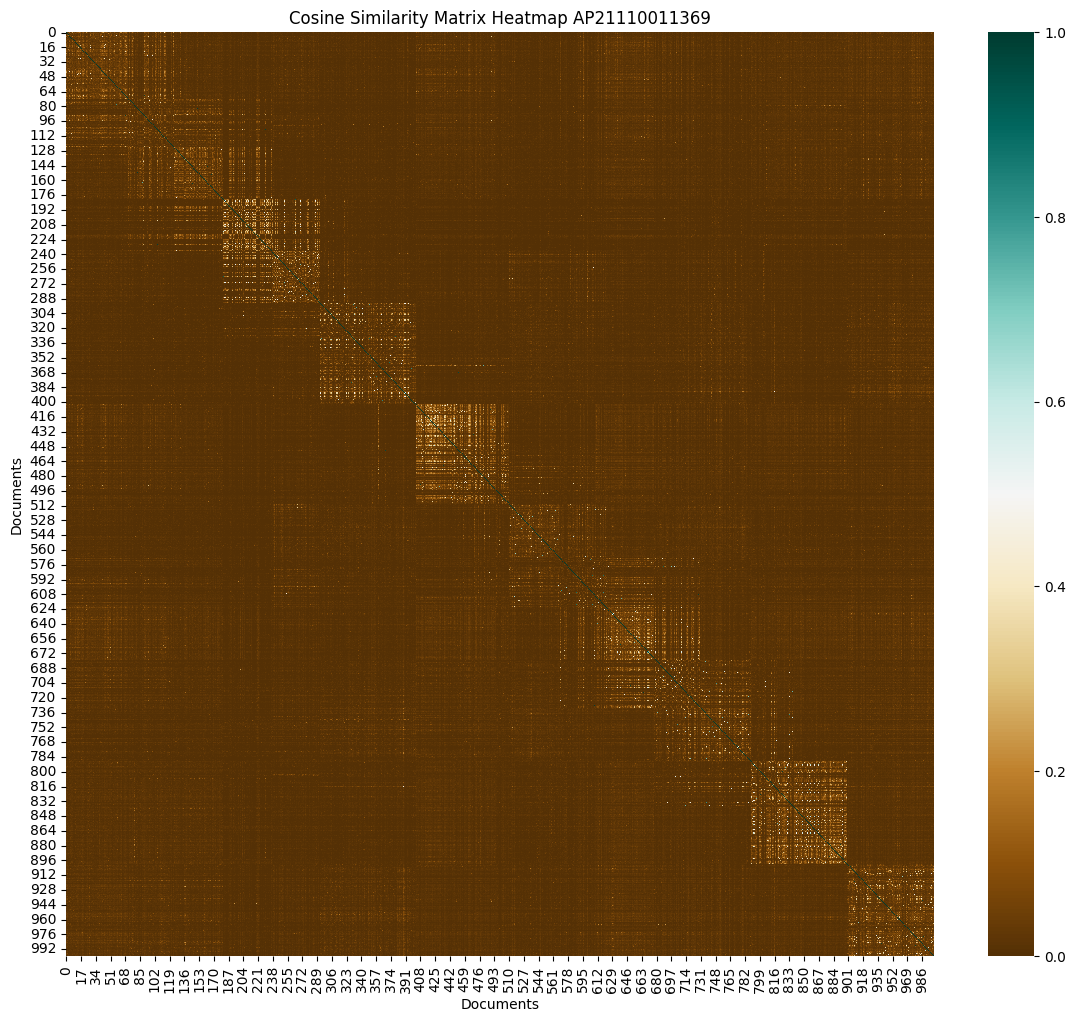

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.figure(figsize=(14, 12))  # Set the size of the plot
sns.heatmap(cosine_sim_matrix, cmap='BrBG', annot=False)  # Use coolwarm color map
plt.title("Cosine Similarity Matrix Heatmap AP21110011369")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()

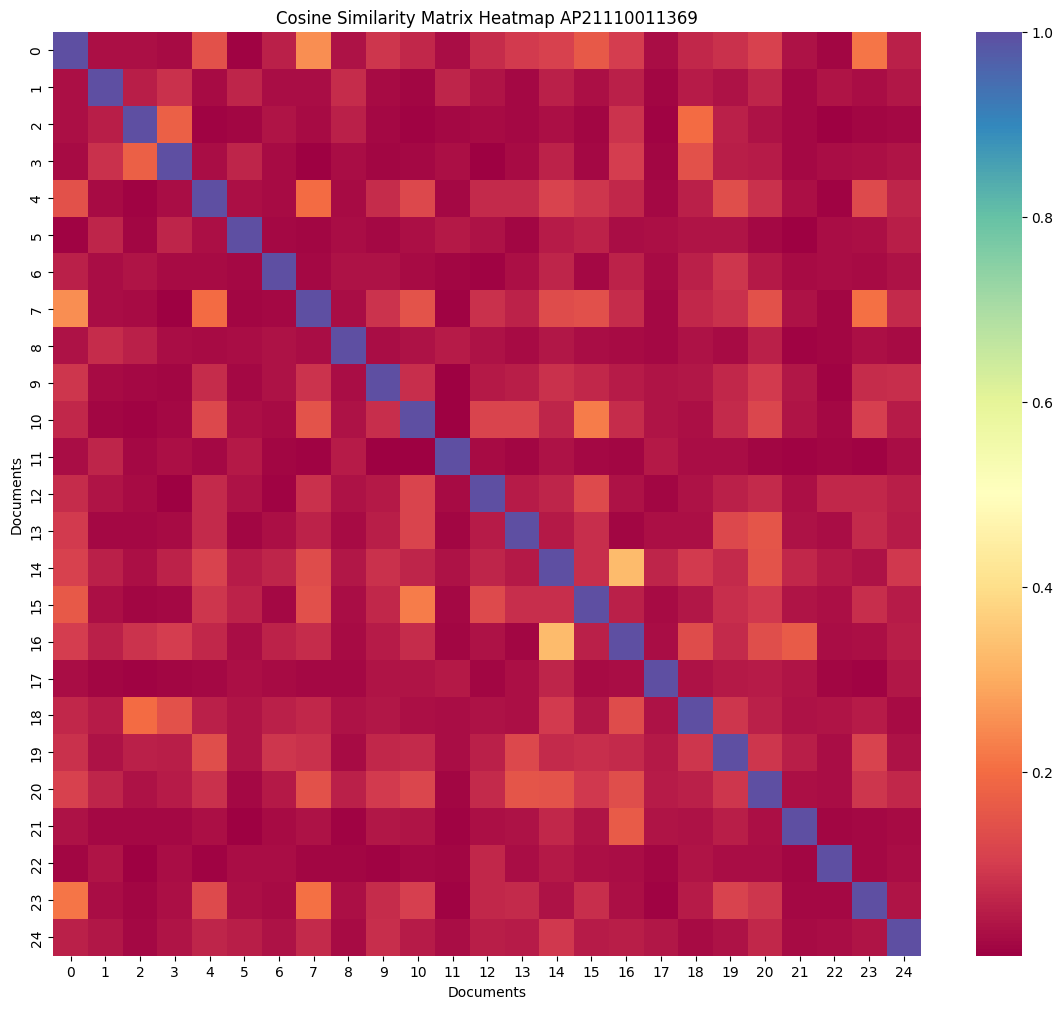

In [21]:
plt.figure(figsize=(14, 12))  # Set the size of the plot
sns.heatmap(cosine_sim_matrix[:25,:25], cmap='Spectral')  # Use coolwarm color map
plt.title("Cosine Similarity Matrix Heatmap AP21110011369")
plt.xlabel("Documents")
plt.ylabel("Documents")
plt.show()